### Trying to use logistic regression on the Spotify Hit Predictor Dataset
By Rahman Khandakar

Importing some neccessaring things

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [11]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')


Getting the multiple datasets from the different decades and putting them into one DataFrame.

In [12]:
df = [pd.read_csv(f'dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1']]
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    df[i]['decade'] = pd.Series(decade, index=df[i].index)
music_hit_df = pd.concat(df).reset_index(drop=True)

music_hit_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,1960
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,1960
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,1960
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,1960
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,1960


In [13]:
music_hit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

There are no missing values in the dataset.

We do not need the track, aritist, or uri as it will not affect our results.

In [14]:
music_hit_df.drop(labels=['track', 'artist', 'uri'], axis=1, inplace=True) 
music_hit_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,1960
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,1960
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,1960
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,1960
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,1960


In [18]:
music_hit_X = music_hit_df[music_hit_df.drop(columns='target', inplace=False).columns]
music_hit_y = music_hit_df['target']

Using cross validation to see how well the logistic regression model can predict new songs.

In [24]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
logr_model = LogisticRegression(max_iter=500)
logr_results = cross_val_score(logr_model, music_hit_X, music_hit_y, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (logr_results.mean(), logr_results.std()))

Accuracy: 0.533 (0.035)


In [27]:
music_hit_X_train, music_hit_X_test, music_hit_y_train, music_hit_y_test = train_test_split(music_hit_X, music_hit_y, test_size=0.3, random_state=0)

In [29]:
logr_1test_model = LogisticRegression(max_iter=500)
logr_1test_model.fit(music_hit_X_train, music_hit_y_train)

LogisticRegression(max_iter=500)

In [30]:
logr_1test_predictions = logr_1test_model.predict(music_hit_X_test)
print(confusion_matrix(music_hit_y_test, logr_1test_predictions))
print(classification_report(music_hit_y_test, logr_1test_predictions))

[[3277 2916]
 [2716 3423]]
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      6193
           1       0.54      0.56      0.55      6139

    accuracy                           0.54     12332
   macro avg       0.54      0.54      0.54     12332
weighted avg       0.54      0.54      0.54     12332



The accuracy of 0.533 is doing just a little better than random. Next we will scaled the data so that no feature with big magnitudes can sway the model significantly.

In [120]:
scaler = StandardScaler()
music_hit_X_scaled = scaler.fit_transform(music_hit_X)

music_hit_X_train, music_hit_X_test, music_hit_y_train, music_hit_y_test = train_test_split(music_hit_X_scaled, music_hit_y, test_size=0.3, random_state=0)

In [127]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
logr_model = LogisticRegression(max_iter=500)
logr_results = cross_val_score(logr_model, music_hit_X_scaled, music_hit_y, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (logr_results.mean(), logr_results.std()))

Accuracy: 0.741 (0.007)


In [114]:
logr_1test_model = LogisticRegression(max_iter=500)
logr_1test_model.fit(music_hit_X_train, music_hit_y_train)

LogisticRegression(max_iter=500)

In [115]:
logr_1test_predictions = logr_1test_model.predict(music_hit_X_test)
print(confusion_matrix(music_hit_y_test, logr_1test_predictions))
print(classification_report(music_hit_y_test, logr_1test_predictions))

[[4051 2142]
 [1101 5038]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      6193
           1       0.70      0.82      0.76      6139

    accuracy                           0.74     12332
   macro avg       0.74      0.74      0.74     12332
weighted avg       0.74      0.74      0.74     12332



This accuracy of 0.74 is much better showing that some features were swaying the model because of their large units.

Applying PCA to reduce the number of features and try to stop possible overfitting. Logistic regression can be prone to this when there are a lot of features.

Eigenvalues:
[3.19642385 2.07337716 1.41343467 1.20566828 1.11007823 1.06263333
 1.0054156  0.92853231 0.88533149 0.85251553 0.73261444 0.58992402
 0.40714369 0.3078275  0.1410716  0.08839754]

Variances (Percentage):
[19.97716306 12.95829197  8.8337518   7.53524341  6.93782019  6.64129674
  6.28369465  5.80318577  5.53318718  5.32809244  4.57872886  3.6869354
  2.54458618  1.9238751   0.88167606  0.55247119]



Text(0, 0.5, 'Explained variance (%)')

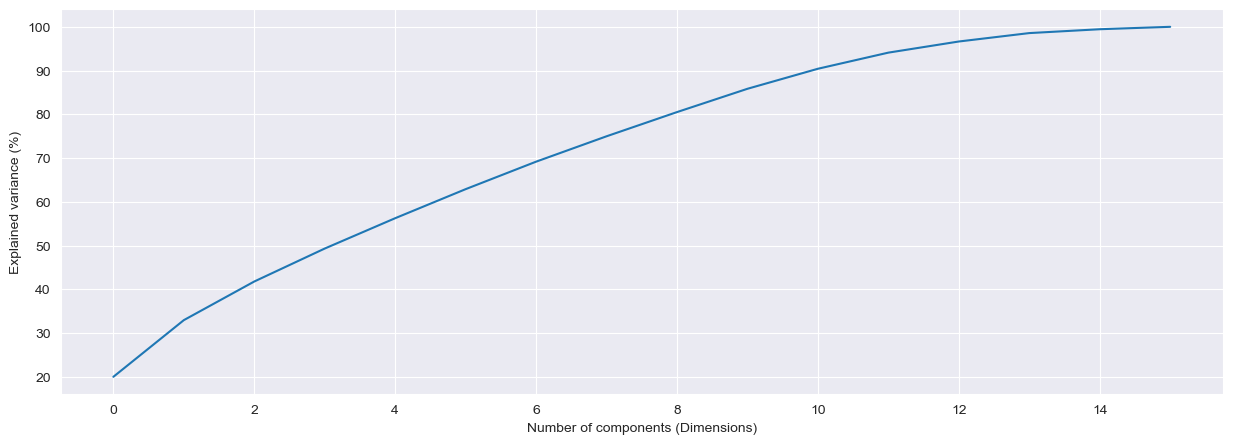

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(music_hit_X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

From this we can see that the first 10 features account for about 90% variablility in the dataset.

In [121]:
pca = PCA(n_components=10)
music_hit_X_pca = pca.fit_transform(music_hit_X_scaled)

music_hit_X_pca = pd.DataFrame(music_hit_X_pca)

In [122]:
music_hit_X_pca_train, music_hit_X_pca_test, music_hit_y_pca_train, music_hit_y_pca_test = train_test_split(music_hit_X_pca, music_hit_y, test_size=0.30, random_state=0)

In [123]:
logr_pca_model = LogisticRegression(max_iter=500)
logr_pca_model.fit(music_hit_X_pca_train, music_hit_y_pca_train)

LogisticRegression(max_iter=500)

In [124]:
logr_pca_predictions = logr_pca_model.predict(music_hit_X_pca_test)
print(confusion_matrix(music_hit_y_pca_test, logr_pca_predictions))
print(classification_report(music_hit_y_pca_test, logr_pca_predictions))

[[4014 2179]
 [1477 4662]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      6193
           1       0.68      0.76      0.72      6139

    accuracy                           0.70     12332
   macro avg       0.71      0.70      0.70     12332
weighted avg       0.71      0.70      0.70     12332



In [126]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
logr_model = LogisticRegression(max_iter=500)
logr_results = cross_val_score(logr_model, music_hit_X_pca, music_hit_y, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (logr_results.mean(), logr_results.std()))

Accuracy: 0.700 (0.004)


Trying to use pca did not help with this logistic regression model to improve its accuracy, but it does not mean it can't be helpful with other possible models used in the dataset.

Trying to make the different dates as categorical variables rather than qualitative as it was.

In [133]:
decades = ['60s', '70s', '80s', '90s', '2000s', '2010s']
df = [pd.read_csv(f'dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1']]

for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    df[i]['decade'] = pd.Series(str(decades[i]), index=df[i].index)

music_hit_df = pd.concat(df).reset_index(drop=True)

In [134]:
music_hit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [135]:
music_hit_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [136]:
music_hit_df.drop(labels=['track', 'artist', 'uri'], axis=1, inplace=True) # We do not need this as it will not affect our results.
music_hit_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [137]:
music_hit_df = pd.get_dummies(music_hit_df, drop_first=True)

In [138]:
music_hit_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,duration_ms,time_signature,chorus_hit,sections,target,decade_2010s,decade_60s,decade_70s,decade_80s,decade_90s
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,...,173533,3,32.94975,9,1,0,1,0,0,0
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,...,213613,4,48.82510,10,0,0,1,0,0,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,...,223960,4,37.22663,12,0,0,1,0,0,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,...,157907,4,24.75484,8,0,0,1,0,0,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,...,245600,4,21.79874,14,0,0,1,0,0,0


In [139]:
music_hit_X = music_hit_df[music_hit_df.drop(columns='target', inplace=False).columns]
music_hit_y = music_hit_df['target']

In [140]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
logr_model = LogisticRegression(max_iter=500)
logr_results = cross_val_score(logr_model, music_hit_X_scaled, music_hit_y, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (logr_results.mean(), logr_results.std()))

Accuracy: 0.741 (0.007)


The one-hot encoding did not make a difference in how accurate the model could be.

From all of this, we can see that the logistic regression model that scaled its features performed the best out of all of the attempts with an accuracy of 0.74.